In [1]:
import pandas as pd 
import numpy as np
pd.set_option('display.max_columns',None)
from sklearn.feature_extraction.text import CountVectorizer
import jieba # 导入关键字提取库
import pandas as pd  # 导入pandas
# import newspaper


In [2]:
def improt_data(lujing,code):
    data = pd.read_excel(lujing,encoding =code)
    return data

def wenzi(list_1,z):
    list_2 = []
    i = 0
    for x in list_1:
        y = x
        tr = y.find(z)
        if tr > -1 :
            i = i+1
            list_2.append(x)
   

    print('关于' + '“' + zi + '”' + '的订单数量是：',i)  
    return list_2

def jiebe(data):    
    text_list = []
    for line in data:
        hou = ",".join(jieba.cut(line))
        strlist = hou.split(',') 
        text_list.append(strlist)
    return text_list

def clean(list_name_,stopwords_):    
    clean_line = []
    for line in list_name_:
        haha = []
        for word in line:
            if word in stopwords_:
                continue
            haha.append(word)
        haha = ','.join(haha)
        clean_line.append(haha)

    return clean_line

def drop_du(data,a):
    df = data.drop_duplicates(subset=a,inplace=False,keep = 'last')
    list_ = list(df[a])
    list_sum = []
    list_sum_ = []
    list__ = []
    for i in range(len(list_)):
        b = list_[i]
        sum_ = data[data[a] == b ]['订单编号'].count()
        dict_ = {}
    
        if sum_ > 1 :
            list__.append(b)
            dict_ = {b:sum_}
            list_sum.append(dict_)
        else:
            list__.append(b)
            dict_ = {b:sum_}
            list_sum_.append(dict_)
        i = i + 1  
    k = [list_sum,list_sum_,list__]
    return k

In [6]:
lujing = '星级门店1.xls'
code = 'utf8'
df_dengji1 = improt_data(lujing,code)

In [7]:
lujing = '星级门店2.xlsx'
code = 'utf8'
df_dengji2 = improt_data(lujing,code)

In [8]:
lujing = '详情.xlsx'
code = 'utf8'
df_xiangqing = improt_data(lujing,code)

In [9]:
lujing = '日详情.xlsx'
code = 'utf8'
df_xiangqing_ri = improt_data(lujing,code)

In [10]:
# data1 = df_xiangqing.drop_duplicates(subset='门店名称',keep=False)
# data2 = df_xiangqing.drop_duplicates(subset='门店名称',keep='first')
# data2.append(data1).drop_duplicates(keep=False)

In [11]:
# df_xiangqing[df_xiangqing['门店名称'] == '邂逅花坊鲜花(四季花屋)']

In [12]:
# df_xiangqing['地址名称'] = df_xiangqing['城市'] + df_xiangqing['门店名称']

In [13]:
df_xd = pd.merge(df_xiangqing,df_dengji1,on='门店名称')


In [14]:
df_xd

,日期,城市,门店名称,曝光人数,曝光人数环比,访问人数,访问人数环比,曝光访问转化率,曝光访问转化率环比,意向转化人数,意向转化人数环比,意向转化率,意向转化率环比,门店ID,美团星级,美团星级变化,大众点评点评星级,大众点评星级变化
0,2020-08,万宁,邂逅花坊鲜花(雅景花坊),1693,+226%,390,+207%,23.04%,-6%,29,+867%,7.44%,+215%,121560030,3.9星,持平,0.00星,持平
1,2020-08,万州区,邂逅花坊鲜花(竞花园店),2626,+137%,602,+210%,22.92%,+31%,53,+489%,8.80%,+90%,111559299,4.5星,+0.3星,3.97星,+3.97星
2,2020-08,万州区,邂逅花坊鲜花(花艺空间店),660,+102%,95,+157%,14.39%,+27%,6,0,6.32%,0,132842379,0星,持平,0.00星,持平
3,2020-08,三河市,小立鲜花店(小立鲜花店（三河店）),976,+263%,203,+372%,20.80%,+30%,17,0,8.37%,0,111603568,3.5星,持平,4.08星,+0.19星
4,2020-08,三河市,邂逅花坊鲜花(百合花坊),1937,+153%,519,+185%,26.79%,+13%,19,+375%,3.66%,+66%,132843573,4.3星,持平,4.07星,-0.01星
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,2020-08,马鞍山,邂逅花坊鲜花(婷雅花坊店),34528,-2%,1388,+58%,4.02%,+61%,79,-86%,5.69%,-91%,127544279,5星,持平,4.05星,-0.02星
151,2020-08,鹰潭,邂逅花坊鲜花·花开时节,816,+149%,105,+338%,12.87%,+76%,4,+100%,3.81%,-54%,112226224,4.4星,持平,0.00星,持平
152,2020-08,鹰潭,邂逅花坊鲜花(鑫美花卉),2546,+81%,631,+92%,24.78%,+6%,49,+513%,7.77%,+220%,127736099,5星,持平,0.00星,持平
153,2020-08,黄山,邂逅花坊鲜花(百花苑婚庆),873,+109%,110,+175%,12.60%,+31%,7,+600%,6.36%,+154%,127655453,4.3星,持平,0.00星,持平


In [15]:
df_xd['美团星级'] = df_xd['美团星级'].str.split('星',expand=True)[0]
df_xd['大众点评点评星级'] = df_xd['大众点评点评星级'].str.split('星',expand=True)[0]

In [16]:
df_xd = df_xd[['门店ID','日期','城市','门店名称','曝光人数','访问人数','意向转化人数','曝光访问转化率','意向转化率','美团星级','美团星级变化','大众点评点评星级','大众点评星级变化']]

In [17]:
xd = df_xd

In [18]:
xd = xd.sort_values(by='美团星级',ascending=False)

In [19]:
xd

,门店ID,日期,城市,门店名称,曝光人数,访问人数,意向转化人数,曝光访问转化率,意向转化率,美团星级,美团星级变化,大众点评点评星级,大众点评星级变化
97,127588998,2020-08,泸州,邂逅花坊鲜花(花语店),926,143,5,15.44%,3.50%,5,持平,3.79,-0.03星
25,127546074,2020-08,北京,邂逅花坊鲜花(雪莲花艺),8329,445,48,5.34%,10.79%,5,+0.1星,4.45,+0.05星
136,110655152,2020-08,铜梁区,佳佳花艺,2978,433,32,14.54%,7.39%,5,持平,3.75,-0.05星
110,122146353,2020-08,白山,邂逅花坊鲜花(青青花行),1488,235,12,15.79%,5.11%,5,持平,3.67,持平
132,110752444,2020-08,邳州市,邂逅花坊鲜花(福地花苑店),2897,287,15,9.91%,5.23%,5,持平,3.56,持平
...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,130695097,2020-08,衢州,邂逅花坊鲜花(最美时光花艺店),710,42,5,5.92%,11.90%,0,持平,0.00,持平
58,770992480,2020-08,富阳区,邂逅花坊鲜花(花海花店),167,28,7,16.77%,25.00%,0,持平,0.00,持平
56,1083715505,2020-08,宝应县,邂逅花坊鲜花(珠珠花坊),259,28,0,10.81%,0.00%,0,持平,0.00,持平
95,956765103,2020-08,泗洪县,邂逅花坊鲜花(金喜缘鲜花),4590,158,3,3.44%,1.90%,0,持平,0.00,持平


In [20]:
xd['美团星级'] = xd['美团星级'].astype(float)


In [21]:
xd

,门店ID,日期,城市,门店名称,曝光人数,访问人数,意向转化人数,曝光访问转化率,意向转化率,美团星级,美团星级变化,大众点评点评星级,大众点评星级变化
97,127588998,2020-08,泸州,邂逅花坊鲜花(花语店),926,143,5,15.44%,3.50%,5.0,持平,3.79,-0.03星
25,127546074,2020-08,北京,邂逅花坊鲜花(雪莲花艺),8329,445,48,5.34%,10.79%,5.0,+0.1星,4.45,+0.05星
136,110655152,2020-08,铜梁区,佳佳花艺,2978,433,32,14.54%,7.39%,5.0,持平,3.75,-0.05星
110,122146353,2020-08,白山,邂逅花坊鲜花(青青花行),1488,235,12,15.79%,5.11%,5.0,持平,3.67,持平
132,110752444,2020-08,邳州市,邂逅花坊鲜花(福地花苑店),2897,287,15,9.91%,5.23%,5.0,持平,3.56,持平
...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,130695097,2020-08,衢州,邂逅花坊鲜花(最美时光花艺店),710,42,5,5.92%,11.90%,0.0,持平,0.00,持平
58,770992480,2020-08,富阳区,邂逅花坊鲜花(花海花店),167,28,7,16.77%,25.00%,0.0,持平,0.00,持平
56,1083715505,2020-08,宝应县,邂逅花坊鲜花(珠珠花坊),259,28,0,10.81%,0.00%,0.0,持平,0.00,持平
95,956765103,2020-08,泗洪县,邂逅花坊鲜花(金喜缘鲜花),4590,158,3,3.44%,1.90%,0.0,持平,0.00,持平


In [22]:
xd_one = xd[xd['美团星级'] >= 4.5]
xd_two =xd[(xd['美团星级'] >3.5)  & (xd['美团星级'] <=4.5)]
xd_three = xd[(xd['美团星级'] >0)  & (xd['美团星级'] <=3.5)]
xd_four = xd[xd['美团星级'] == 0]

In [26]:
xd_one.to_excel('一级门店.xlsx')
xd_two.to_excel('二级门店.xlsx')
xd_three.to_excel('三级门店.xlsx')
xd_four.to_excel('四级门店.xlsx')

In [23]:
print(xd_one['门店ID'].count())
print(xd_two['门店ID'].count())
print(xd_three['门店ID'].count())
print(xd_four['门店ID'].count())

42
55
15
50


In [92]:
xd_one_list = list(xd_two['门店名称'])
xd_two_list = list(xd_two['门店名称'])
xd_three_list = list(xd_three['门店名称'])
xd_four_list = list(xd_four['门店名称'])

In [93]:
xd_d = []

In [94]:
xd_d.append(xd_one_list)
xd_d.append(xd_two_list)
xd_d.append(xd_three_list)
xd_d.append(xd_four_list)

In [95]:
xd_one = xd_one.sort_values(by='曝光人数',ascending=False)
xd_two = xd_two.sort_values(by='曝光人数',ascending=False)
xd_three = xd_three.sort_values(by='曝光人数',ascending=False)
xd_four = xd_four.sort_values(by='曝光人数',ascending=False)

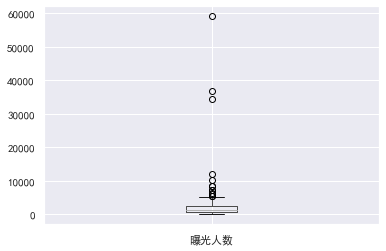

In [96]:
xd.boxplot('曝光人数')

In [97]:
Q1 = np.percentile(xd['曝光人数'], 25)
Q3 = np.percentile(xd['曝光人数'], 75)
Q2 = np.percentile(xd['曝光人数'], 50)
IQ = Q3 - Q1

In [98]:
xd.corr()

,门店ID,曝光人数,访问人数,意向转化人数,美团星级
门店ID,1.000000,-0.116195,-0.246158,-0.182702,-0.506261
曝光人数,-0.116195,1.000000,0.847726,0.476231,0.222780
访问人数,-0.246158,0.847726,1.000000,0.612120,0.392955
意向转化人数,-0.182702,0.476231,0.612120,1.000000,0.301601
美团星级,-0.506261,0.222780,0.392955,0.301601,1.000000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 26333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 20809 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 20154 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 35775 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 38382 missing from c

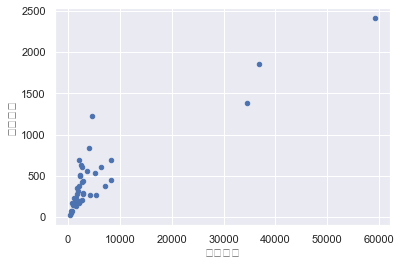

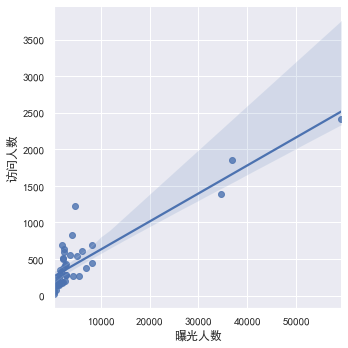

In [99]:
from pylab  import mpl
import seaborn as sns; sns.set()
%matplotlib inline
mpl.rcParams['font.sans-serif'] = ['SimHei']   # 指定默认字体：解决plot不能显示中文问题
mpl.rcParams['axes.unicode_minus'] = False    
xd_one.plot.scatter(x='曝光人数', y='访问人数')
sns.set(font='SimHei',font_scale=1)
sns.lmplot(x='曝光人数', y='访问人数', data=xd_one)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


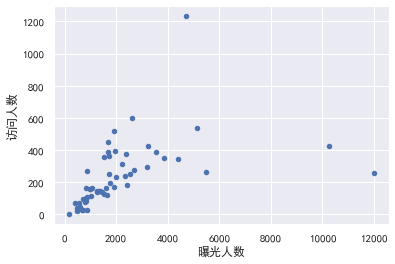

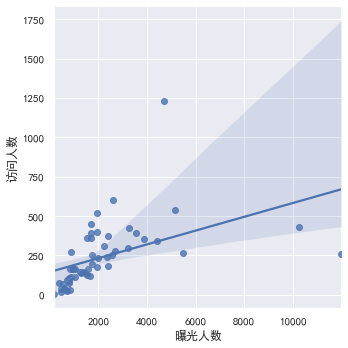

In [100]:
xd_two.plot.scatter(x='曝光人数', y='访问人数')
sns.set(font='SimHei',font_scale=1)
sns.lmplot(x='曝光人数', y='访问人数', data=xd_two)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


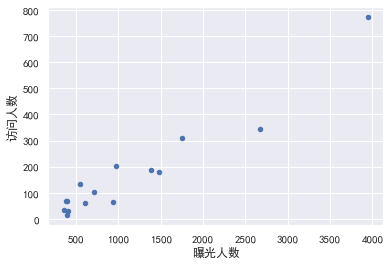

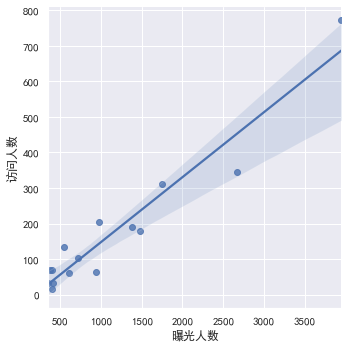

In [101]:
xd_three.plot.scatter(x='曝光人数', y='访问人数')
sns.set(font='SimHei',font_scale=1)
sns.lmplot(x='曝光人数', y='访问人数', data=xd_three)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


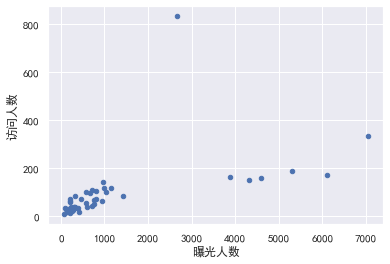

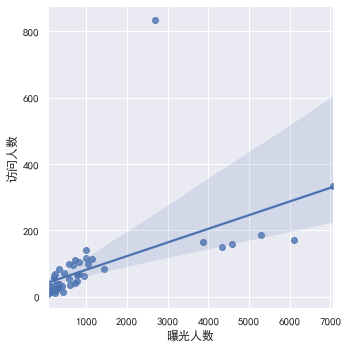

In [102]:
xd_four.plot.scatter(x='曝光人数', y='访问人数')
sns.set(font='SimHei',font_scale=1)
sns.lmplot(x='曝光人数', y='访问人数', data=xd_four)

In [103]:
xd_one

,门店ID,日期,城市,门店名称,曝光人数,访问人数,意向转化人数,曝光访问转化率,意向转化率,美团星级,美团星级变化,大众点评点评星级,大众点评星级变化
11,130648305,2020-08,东阳,邂逅花坊鲜花(知音婚庆鲜花店),59162,2417,104,4.09%,4.30%,5.0,持平,3.97,+3.97星
124,9026049,2020-08,资阳,花语鲜花,36829,1858,109,5.04%,5.87%,5.0,+0.1星,4.55,-0.01星
150,127544279,2020-08,马鞍山,邂逅花坊鲜花(婷雅花坊店),34528,1388,79,4.02%,5.69%,5.0,持平,4.05,-0.02星
70,126427126,2020-08,德惠市,花雨轩花艺,8345,690,37,8.27%,5.36%,5.0,持平,3.83,-0.01星
25,127546074,2020-08,北京,邂逅花坊鲜花(雪莲花艺),8329,445,48,5.34%,10.79%,5.0,+0.1星,4.45,+0.05星
141,66237179,2020-08,长治,锦尚鲜花(雅韵鲜花店),7076,379,19,5.36%,5.01%,5.0,+0.5星,3.00,持平
57,40598484,2020-08,密山市,邂逅花坊鲜花林東花鸟鱼,6302,611,28,9.70%,4.58%,5.0,持平,0.00,持平
137,67764314,2020-08,镇江,心语花苑,5491,265,7,4.83%,2.64%,4.5,持平,3.83,持平
63,503495836,2020-08,峨眉山市,邂逅花坊鲜花(良缘婚庆鲜花),5147,537,18,10.43%,3.35%,4.5,+4.5星,0.00,持平
126,112144286,2020-08,迁安市,邂逅花坊鲜花(季盛店),4714,1231,62,26.11%,5.04%,4.5,-0.1星,3.83,+0.01星


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


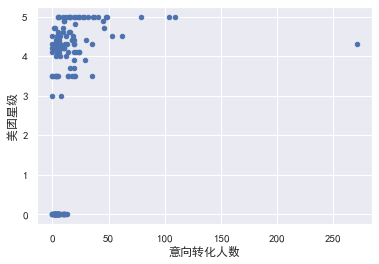

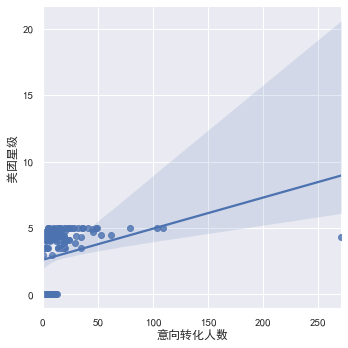

In [104]:
xd.plot.scatter(x='意向转化人数', y='美团星级')
sns.set(font='SimHei',font_scale=1)
sns.lmplot(x='意向转化人数', y='美团星级', data=xd)

In [105]:
def linear(x,y):
    from sklearn import metrics
    import numpy as np
    from sklearn.model_selection import train_test_split
    from sklearn import linear_model
    X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1)
    print('数据分集查看')
    print ('X训练',X_train.shape)
    print ('y训练',y_train.shape)
    print ('X测试',X_test.shape)
    print ('y测试',y_test.shape)
    print('-------------')
    linear =  linear_model.LinearRegression()
    linear.fit(X_train,y_train)
    print('线性结截距:', linear.intercept_)
    print ('回归系数',linear.coef_)
    y_pred = linear.predict(X_test)
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

def line_bg_rd(data):   
    baoguang = data['曝光人数'].values.reshape(-1,1)
    jindian = data['访问人数'].values.reshape(-1, 1)
    linear(baoguang,jindian)


In [106]:
line_bg_rd(xd_one)
line_bg_rd(xd_two)
line_bg_rd(xd_three)
line_bg_rd(xd_four)

数据分集查看
X训练 (31, 1)
y训练 (31, 1)
X测试 (11, 1)
y测试 (11, 1)
-------------
线性结截距: [255.01051313]
回归系数 [[0.03912908]]
RMSE: 171.97784443106437
数据分集查看
X训练 (41, 1)
y训练 (41, 1)
X测试 (14, 1)
y测试 (14, 1)
-------------
线性结截距: [169.99757539]
回归系数 [[0.03836625]]
RMSE: 136.5579666509596
数据分集查看
X训练 (11, 1)
y训练 (11, 1)
X测试 (4, 1)
y测试 (4, 1)
-------------
线性结截距: [-25.89568555]
回归系数 [[0.18262673]]
RMSE: 53.78736604855279
数据分集查看
X训练 (37, 1)
y训练 (37, 1)
X测试 (13, 1)
y测试 (13, 1)
-------------
线性结截距: [42.71915255]
回归系数 [[0.04586301]]
RMSE: 43.33659945684031


In [107]:
a = xd_one['意向转化人数'].sum()
b = xd_one['门店ID'].count()
print(a)
print(b)
print(a/b)
c = xd_one['意向转化人数'].std()
print(c)

1106
42
26.333333333333332
25.663551706240153


In [108]:
a = xd_two['意向转化人数'].sum()
b = xd_two['门店ID'].count()
print(a)
print(b)
print(a/b)
c = xd_two['意向转化人数'].std()
print(c)

929
55
16.89090909090909
36.994330259925924


In [109]:
a = xd_three['意向转化人数'].sum()
b = xd_three['门店ID'].count()
print(a)
print(b)
print(a/b)
c = xd_three['意向转化人数'].std()
print(c)

144
15
9.6
10.041343108796323


In [110]:
a = xd_four['意向转化人数'].sum()
b = xd_four['门店ID'].count()
print(a)
print(b)
print(a/b)
c = xd_four['意向转化人数'].std()
print(c)

210
50
4.2
3.3502969713024493


In [111]:
df_xiangqing_ri

,日期,城市,门店名称,曝光人数,访问人数,曝光访问转化率,意向转化人数,意向转化率
0,2020-08-01,万宁,邂逅花坊鲜花(雅景花坊),20,9,45.00%,1,11.11%
1,2020-08-02,万宁,邂逅花坊鲜花(雅景花坊),23,9,39.13%,0,0.00%
2,2020-08-03,万宁,邂逅花坊鲜花(雅景花坊),21,8,38.10%,1,12.50%
3,2020-08-04,万宁,邂逅花坊鲜花(雅景花坊),15,9,60.00%,1,11.11%
4,2020-08-05,万宁,邂逅花坊鲜花(雅景花坊),13,2,15.38%,0,0.00%
5,2020-08-06,万宁,邂逅花坊鲜花(雅景花坊),17,4,23.53%,0,0.00%
6,2020-08-07,万宁,邂逅花坊鲜花(雅景花坊),22,10,45.45%,1,10.00%
7,2020-08-08,万宁,邂逅花坊鲜花(雅景花坊),24,6,25.00%,1,16.67%
8,2020-08-09,万宁,邂逅花坊鲜花(雅景花坊),22,7,31.82%,1,14.29%
9,2020-08-10,万宁,邂逅花坊鲜花(雅景花坊),17,5,29.41%,0,0.00%
